<a href="https://colab.research.google.com/github/dcbfoss/vagbhata/blob/main/Vagbhata_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vagbhata LSTM Project**
---

>## **Project Concept**
>> The idea is so simple. Through this approach only three models will be created. Models are exclusively trained on AS, AH and CS separately resulting in creation of three models.
</br> The datasets will be splitted for training and testing data at a ratio of **80:20** respectively for all the three books. The models will be created using training data.
</br> The testing data will be used to find the distance (d) between documents.



>>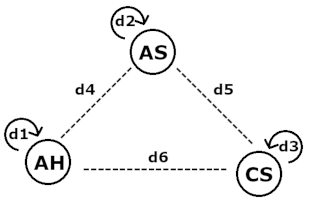

>> After creating three models, six measurement analysis will be performed.
```
d1 --> AH training vs AH testing
d2 --> AS training vs AS testing
d3 --> CS training vs CS testing
d4 --> AH training vs AS testing
   --> AS training vs AH testing
d5 --> AS training vs CS testing
   --> CS training vs AS testing
d6 --> AH training vs CS testing
   --> CS training vs AH testing
```


The above mentioned measurements are based on input data.
<table><tr><th>
Text_Type</th><th>	Book</th><th>	Chapter</th><th>	Window</th><th>	Avg Word Len</th><th>	Avg Sen Len (Word)</th><th>	Avg Sen Len (Chr)</th><th>	Richness</th><th>	Shannon</th><th>	Avg Compound Words</th></tr>
<tr><td>SN</td><td>	AH</td><td>	chikitsa</td><td>	1</td><td>	7.62</td><td>	5.2</td><td>	18.72</td><td>	0.92</td><td>	0.15</td><td>	0.03</td></tr>
<tr><td>SN</td><td>	AH</td><td>	chikitsa</td><td>	2</td><td>	7.66</td><td>	5.12</td><td>	18.72</td><td>	0.91</td><td>	0.15</td><td>	0.03</td></tr>
<tr><td>SN</td><td>	AH</td><td>	chikitsa</td><td>	3</td><td>	7.77</td><td>	5.08</td><td>	18.72</td><td>	0.91</td><td>	0.15</td><td>	0.03</td></tr>
</table>


The final distance (d) of a given analysis (example d4) can be measured by taking average of all the distances from actual test data and predicted data.

Consider a single example case</br>
>> The actual test data is
>><table><tr><th>
Text_Type</th><th>	Book</th><th>	Chapter</th><th>	Window</th><th>	Avg Word Len</th><th>	Avg Sen Len (Word)</th><th>	Avg Sen Len (Chr)</th><th>	Richness</th><th>	Shannon</th><th>	Avg Compound Words</th></tr><tr><td>SN	</td><td>AH	</td><td>chikitsa	</td><td>2	</td><td>7.66	</td><td>5.12	</td><td>18.72	</td><td>0.91	</td><td>0.15	</td><td>0.03</tr></table>

>> But prediction from the model is
>><table><tr><th>
Text_Type</th><th>	Book</th><th>	Chapter</th><th>	Window</th><th>	Avg Word Len</th><th>	Avg Sen Len (Word)</th><th>	Avg Sen Len (Chr)</th><th>	Richness</th><th>	Shannon</th><th>	Avg Compound Words</th></tr><tr><td>SN	</td><td>AH	</td><td>chikitsa	</td><td>2	</td><td>8.02	</td><td>5.01	</td><td>15.25	</td><td>0.72	</td><td>0.15	</td><td>0.03</tr></table>


```
p1 - predicted average word length
p2 - predicted average sentence length (word)
p3 - predicted average sentence length (character)
p4 - predicted richness
p5 - predicted shannon
p6 - predicted average compound words

t1 - actual average word length
t2 - actual average sentence length (word)
t3 - actual average sentence length (character)
t4 - actual richness
t5 - actual shannon
t6 - actual average compound words
```

such individual distances are then used to calculate the average and plot graphs. This average can be considered as total distance.
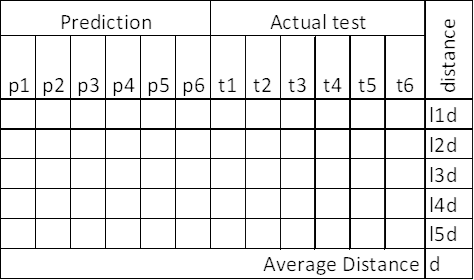



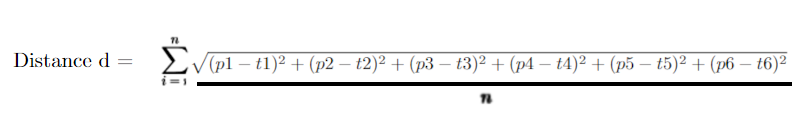

# Methodology
---

## Preparation of Dataset

In [ ]:
import os
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtaloc = '/content/drive/MyDrive/Vag_Data/'
ah_dta = [dtaloc+'AH/Quantitative/25/'+i for i in os.listdir(dtaloc+'AH/Quantitative/25/')];ah_dta.sort()
as_dta = [dtaloc+'AS/Quantitative/25/'+i for i in os.listdir(dtaloc+'AS/Quantitative/25/')];as_dta.sort()
cs_dta = [dtaloc+'CS/Quantitative/25/'+i for i in os.listdir(dtaloc+'CS/Quantitative/25/')];cs_dta.sort()

In [ ]:
def splitdata(data):
    point = int(len(data)*0.8)
    return (data[:point], data[point:])

def readdoc(fileloc):
    data = []
    with open(fileloc,'r') as inpfile:
        for index, line in enumerate(inpfile):
            if index>0:data.append([float(i) for i in line.rstrip().split(',')[4:]])
    return data

def prepareforLSTM(data):
    x = []; y = []
    for i in range(len(data)-1):
        x.append(data[i])
        y.append(data[i+1])
    return (np.array(x), np.array(y))

In [ ]:
ah_train = []; ah_test = []
as_train = []; as_test = []
cs_train = []; cs_test = []
# ---------------------------------------

for i in ah_dta:
    data = readdoc(i)
    t_train, t_test = splitdata(data)
    ah_train.extend(t_train);ah_test.extend(t_test)
for i in as_dta:
    data = readdoc(i)
    t_train, t_test = splitdata(data)
    as_train.extend(t_train);as_test.extend(t_test)
for i in cs_dta:
    data = readdoc(i)
    t_train, t_test = splitdata(data)
    cs_train.extend(t_train);cs_test.extend(t_test)

print(len(ah_train), len(ah_test),len(as_train), len(as_test),len(cs_train), len(cs_test))

12338 3088 17950 4490 11868 2970


In [ ]:
# train data for model creation
ah_train_x, ah_train_y = prepareforLSTM(ah_train)
as_train_x, as_train_y = prepareforLSTM(as_train)
cs_train_x, cs_train_y = prepareforLSTM(cs_train)

In [ ]:
# test data for analysis
ah_test_x, ah_test_y = prepareforLSTM(ah_test)
as_test_x, as_test_y = prepareforLSTM(as_test)
cs_test_x, cs_test_y = prepareforLSTM(cs_test)

## Model Creation and Training

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, return_sequences = True, input_shape=(6,1)))
model.add(tf.keras.layers.LSTM(128, input_shape=(6,1)))
model.add(tf.keras.layers.Dense(6))

In [ ]:
ah_model = tf.keras.models.clone_model(model);ah_model.compile(loss= 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])
as_model = tf.keras.models.clone_model(model);as_model.compile(loss= 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])
cs_model = tf.keras.models.clone_model(model);cs_model.compile(loss= 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])

In [ ]:
ah_train_x.reshape(-1,6,1); ah_train_y.reshape(-1,6,1)
history = ah_model.fit(ah_train_x, ah_train_y, epochs=200, batch_size=10, shuffle=False)

Epoch 1/200
1234/1234 [==============================] - 17s 6ms/step - loss: 1.5674 - accuracy: 0.9992
Epoch 2/200
1234/1234 [==============================] - 7s 5ms/step - loss: 1.0492 - accuracy: 1.0000
Epoch 3/200
1234/1234 [==============================] - 8s 7ms/step - loss: 1.0492 - accuracy: 1.0000
Epoch 4/200
1234/1234 [==============================] - 7s 5ms/step - loss: 1.0492 - accuracy: 1.0000
Epoch 5/200
1234/1234 [==============================] - 8s 6ms/step - loss: 1.0500 - accuracy: 1.0000
Epoch 6/200
1234/1234 [==============================] - 6s 5ms/step - loss: 1.0489 - accuracy: 1.0000
Epoch 7/200
1234/1234 [==============================] - 8s 6ms/step - loss: 1.0523 - accuracy: 1.0000
Epoch 8/200
1234/1234 [==============================] - 7s 5ms/step - loss: 1.0511 - accuracy: 1.0000
Epoch 9/200
1234/1234 [==============================] - 8s 6ms/step - loss: 1.0516 - accuracy: 1.0000
Epoch 10/200
1234/1234 [==============================] - 6s 5ms/step - 

In [ ]:
as_train_x.reshape(-1,6,1); as_train_y.reshape(-1,6,1)
history = as_model.fit(as_train_x, as_train_y, epochs=200, batch_size=10, shuffle=False)

Epoch 1/200
1795/1795 [==============================] - 14s 6ms/step - loss: 7.3986 - accuracy: 0.9864
Epoch 2/200
1795/1795 [==============================] - 10s 6ms/step - loss: 7.1602 - accuracy: 0.9864
Epoch 3/200
1795/1795 [==============================] - 10s 6ms/step - loss: 7.1012 - accuracy: 0.9864
Epoch 4/200
1795/1795 [==============================] - 10s 6ms/step - loss: 7.0255 - accuracy: 0.9864
Epoch 5/200
1795/1795 [==============================] - 11s 6ms/step - loss: 4.5499 - accuracy: 0.9864
Epoch 6/200
1795/1795 [==============================] - 10s 6ms/step - loss: 1.1159 - accuracy: 0.9864
Epoch 7/200
1795/1795 [==============================] - 10s 6ms/step - loss: 0.6973 - accuracy: 0.9864
Epoch 8/200
1795/1795 [==============================] - 10s 6ms/step - loss: 0.5414 - accuracy: 0.9892
Epoch 9/200
1795/1795 [==============================] - 11s 6ms/step - loss: 0.4555 - accuracy: 0.9912
Epoch 10/200
1795/1795 [==============================] - 12s 7m

In [ ]:
cs_train_x.reshape(-1,6,1); cs_train_y.reshape(-1,6,1)
history = cs_model.fit(cs_train_x, cs_train_y, epochs=200, batch_size=10, shuffle=False)

Epoch 1/200
1187/1187 [==============================] - 11s 6ms/step - loss: 31.8988 - accuracy: 0.8841
Epoch 2/200
1187/1187 [==============================] - 6s 5ms/step - loss: 31.2635 - accuracy: 0.8902
Epoch 3/200
1187/1187 [==============================] - 7s 6ms/step - loss: 29.8899 - accuracy: 0.8902
Epoch 4/200
1187/1187 [==============================] - 6s 5ms/step - loss: 29.8402 - accuracy: 0.9138
Epoch 5/200
1187/1187 [==============================] - 7s 6ms/step - loss: 21.6271 - accuracy: 0.9558
Epoch 6/200
1187/1187 [==============================] - 6s 5ms/step - loss: 12.6508 - accuracy: 0.9815
Epoch 7/200
1187/1187 [==============================] - 7s 6ms/step - loss: 12.3427 - accuracy: 0.9339
Epoch 8/200
1187/1187 [==============================] - 6s 5ms/step - loss: 6.5141 - accuracy: 0.9927
Epoch 9/200
1187/1187 [==============================] - 9s 7ms/step - loss: 3.9202 - accuracy: 0.9949
Epoch 10/200
1187/1187 [==============================] - 7s 6ms/

In [ ]:
ah_model.save('AH.h5')
as_model.save('AS.h5')
cs_model.save('CS.h5')

## Analysis with Models

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
ah_model = tf.keras.models.load_model('AH.h5')
as_model = tf.keras.models.load_model('AS.h5')
cs_model = tf.keras.models.load_model('CS.h5')

In [ ]:
ah_test_x.reshape(-1,6,1); ah_test_y.reshape(-1,6,1)
as_test_x.reshape(-1,6,1); as_test_y.reshape(-1,6,1)
cs_test_x.reshape(-1,6,1); cs_test_y.reshape(-1,6,1)

In [ ]:
np.savetxt('AH_real.csv', np.around(ah_test_y, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AS_real.csv', np.around(as_test_y, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('CS_real.csv', np.around(cs_test_y, decimals=2),fmt='%.2f',delimiter=',')
#--------------------------------------

ah_ah_preds = ah_model.predict(ah_test_x)
ah_as_preds = ah_model.predict(as_test_x)
ah_cs_preds = ah_model.predict(cs_test_x)
#--------------------------------------

as_as_preds = as_model.predict(as_test_x)
as_ah_preds = as_model.predict(ah_test_x)
as_cs_preds = as_model.predict(cs_test_x)
#--------------------------------------

cs_cs_preds = cs_model.predict(cs_test_x)
cs_as_preds = cs_model.predict(as_test_x)
cs_ah_preds = cs_model.predict(ah_test_x)
#--------------------------------------

np.savetxt('AH_AH_preds.csv', np.around(ah_ah_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AH_AS_preds.csv', np.around(ah_as_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AH_CS_preds.csv', np.around(ah_cs_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AS_AS_preds.csv', np.around(as_as_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AS_AH_preds.csv', np.around(as_ah_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('AS_CS_preds.csv', np.around(as_cs_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('CS_CS_preds.csv', np.around(cs_cs_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('CS_AS_preds.csv', np.around(cs_as_preds, decimals=2),fmt='%.2f',delimiter=',')
np.savetxt('CS_AH_preds.csv', np.around(cs_ah_preds, decimals=2),fmt='%.2f',delimiter=',')
#--------------------------------------

97/97 [==============================] - 0s 3ms/step


In [ ]:
!zip -D Vagbhata_LSTM.zip *
!cp -f Vagbhata_LSTM.zip /content/drive/MyDrive/Vag_Data/Vagbhata_LSTM.zip

updating: AH_AH_preds.csv (deflated 77%)
updating: AH_AS_preds.csv (deflated 76%)
updating: AH_CS_preds.csv (deflated 81%)
updating: AH.h5 (deflated 5%)
updating: AH_real.csv (deflated 78%)
updating: AS_AH_preds.csv (deflated 78%)
updating: AS_AS_preds.csv (deflated 77%)
updating: AS_CS_preds.csv (deflated 81%)
updating: AS.h5 (deflated 4%)
updating: AS_real.csv (deflated 78%)
updating: CS_AH_preds.csv (deflated 79%)
updating: CS_AS_preds.csv (deflated 77%)
updating: CS_CS_preds.csv (deflated 79%)
updating: CS.h5 (deflated 4%)
updating: CS_real.csv (deflated 80%)


## Comparison with Results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Vag_Data/Vagbhata_LSTM.zip ./
!unzip Vagbhata_LSTM.zip

In [ ]:
import math
from statistics import stdev
from matplotlib import pyplot as plt

In [ ]:
def compare(doc1, doc2):
    d1_data = []; d2_data = [];output = []
    with open(doc1,'r') as inpfile:
        for line in inpfile:
            d1_data.append([float(i) for i in line.rstrip().split(',')])
    with open(doc2,'r') as inpfile:
        for line in inpfile:
            d2_data.append([float(i) for i in line.rstrip().split(',')])
    if len(d1_data)==len(d2_data):
        for i, j in zip(d1_data, d2_data):
            t_d = math.sqrt(sum([(i[0]-j[0])**2,(i[1]-j[1])**2,(i[2]-j[2])**2,(i[3]-j[3])**2,(i[4]-j[4])**2,(i[5]-j[5])**2]))
            output.append(t_d)
    else:
        raise LookupError("Files not Matching (in size).")
    return output

def setplot(d1,d2,d3,d4,d5,d6,s1,s2,s3,s4,s5,s6):
    plt.clf()
    plt.rcParams["figure.figsize"] = [8.00, 4.00]; plt.rcParams["figure.autolayout"] = True
    im = plt.imread("/content/drive/MyDrive/Vag_Data/plot_template.png")
    fig, ax = plt.subplots(); im = ax.imshow(im, extent=[0, 310, 0, 203])
    ax.text(18,96, 'd1= '+str(d1)+"±"+str(s1)); ax.text(168,179, 'd2= '+str(d2)+"±"+str(s2))
    ax.text(245,86, 'd3= '+str(d3)+"±"+str(s3));ax.text(100,90, 'd4= '+str(d4)+"±"+str(s4))
    ax.text(203,126, 'd5= '+str(d5)+"±"+str(s5));ax.text(150,23, 'd6= '+str(d6)+"±"+str(s6))
    plt.show()

def mainplot(d1,d2,d3,d4,d5,d6):
    plt.clf()
    d1_x = [i+1 for i in range(len(d1))];d2_x = [i+1 for i in range(len(d2))]
    d3_x = [i+1 for i in range(len(d3))];d4_x = [i+1 for i in range(len(d4))]
    d5_x = [i+1 for i in range(len(d5))];d6_x = [i+1 for i in range(len(d6))]
    plt.subplot(2, 3, 1);plt.plot(d1_x,d1);plt.title("d1");plt.subplot(2, 3, 2);plt.plot(d2_x,d2);plt.title("d2")
    plt.subplot(2, 3, 3);plt.plot(d3_x,d3);plt.title("d3");plt.subplot(2, 3, 4);plt.plot(d4_x,d4);plt.title("d4")
    plt.subplot(2, 3, 5);plt.plot(d5_x,d5);plt.title("d5");plt.subplot(2, 3, 6);plt.plot(d6_x,d6);plt.title("d6")
    plt.show()

def get_stat(data):
    mean = round(sum(data)/len(data),2)
    sd = round(stdev(data),2)
    return (mean, sd)

In [ ]:
d1 = compare('AH_AH_preds.csv','AH_real.csv')
d2 = compare('AS_AS_preds.csv','AS_real.csv')
d3 = compare('CS_CS_preds.csv','CS_real.csv')
d41 = compare('AH_AS_preds.csv','AS_real.csv')
d42 = compare('AS_AH_preds.csv','AH_real.csv')
d51 = compare('AS_CS_preds.csv','CS_real.csv')
d52 = compare('CS_AS_preds.csv','AS_real.csv')
d61 = compare('AH_CS_preds.csv','CS_real.csv')
d62 = compare('CS_AH_preds.csv','AH_real.csv')

In [ ]:
m_d1, sd_d1 = get_stat(d1); m_d2, sd_d2 = get_stat(d2); m_d3, sd_d3 = get_stat(d3)
m_d41, sd_d41 = get_stat(d41); m_d42, sd_d42 = get_stat(d42)
m_d51, sd_d51 = get_stat(d51); m_d52, sd_d52 = get_stat(d52)
m_d61, sd_d61 = get_stat(d61); m_d62, sd_d62 = get_stat(d62)

## Graphs

<Figure size 640x480 with 0 Axes>

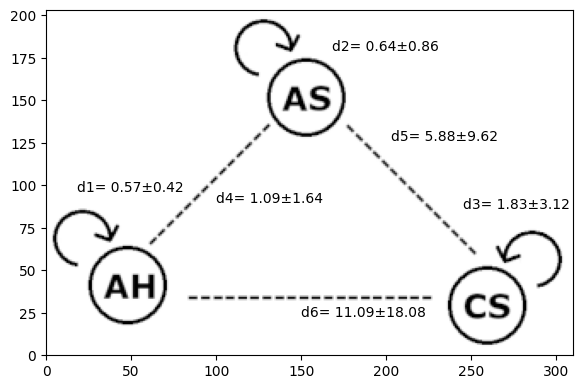

In [ ]:
setplot(m_d1,m_d2,m_d3,m_d41,m_d51,m_d61,sd_d1,sd_d2,sd_d3,sd_d41,sd_d51,sd_d61)

<Figure size 800x400 with 0 Axes>

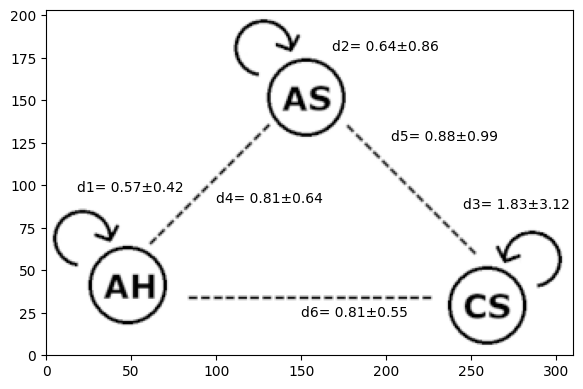

In [ ]:
setplot(m_d1,m_d2,m_d3,m_d42,m_d52,m_d62,sd_d1,sd_d2,sd_d3,sd_d42,sd_d52,sd_d62)

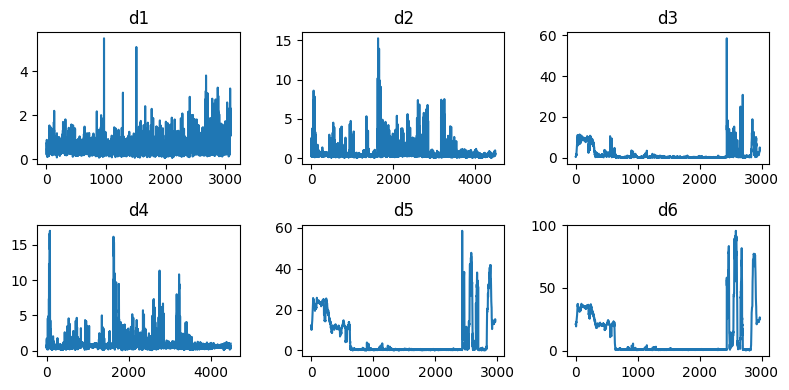

In [ ]:
mainplot(d1,d2,d3,d41,d51,d61)

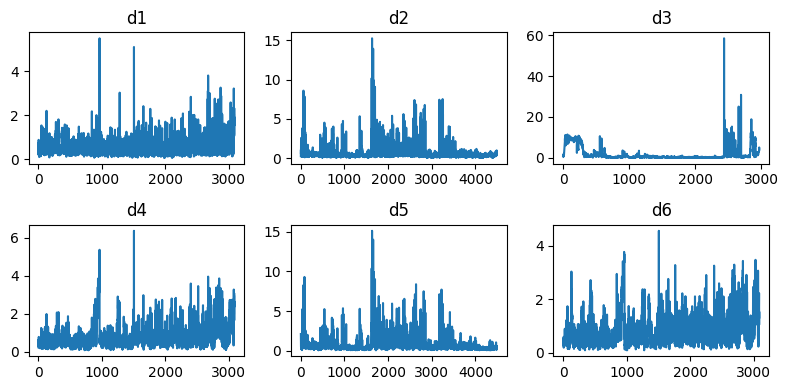

In [ ]:
mainplot(d1,d2,d3,d42,d52,d62)

##Significance Analysis

In [17]:
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind

In [19]:
sig_d = [['Model 1','Model 2','P Value']]
for j, i in zip(['as_cs','cs_as','ah_cs','cs_ah'],[d51,d52,d61,d62]):
    v = ttest_ind(d41,i)[1]
    sig_d.append(['ah_as', j, v])
for j, i in zip(['as_cs','cs_as','ah_cs','cs_ah'], [d51,d52,d61,d62]):
    v = ttest_ind(d42,i)[1]
    sig_d.append(['as_ah', j, v])
df = pd.DataFrame(sig_d)
df

,0,1,2
0,Model 1,Model 2,P Value
1,ah_as,as_cs,0.0
2,ah_as,cs_as,0.0
3,ah_as,ah_cs,0.0
4,ah_as,cs_ah,0.0
5,as_ah,as_cs,0.0
6,as_ah,cs_as,0.000206
7,as_ah,ah_cs,0.0
8,as_ah,cs_ah,0.90921
